In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

process wine data into separate training and test datasets!

In [10]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
#standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [11]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[4.79500219 2.50003078 1.44306678 0.99901271 0.87517717 0.67821564
 0.53031813 0.35080209 0.28446498 0.11333093 0.14810971 0.18968162
 0.19934466]


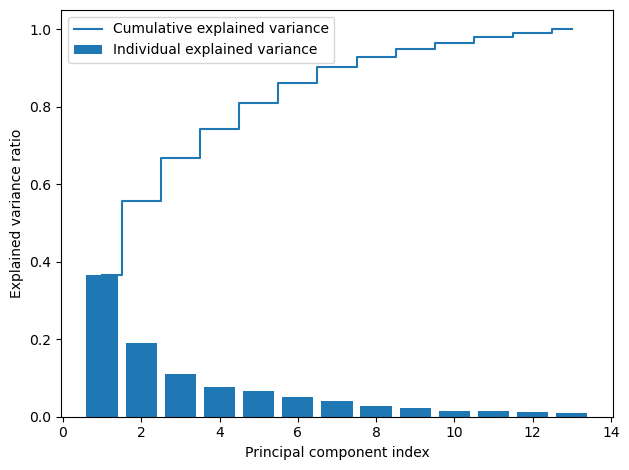

In [12]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

feature transformation: 
1. select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k<=d)
2. construct a projection matrix W, from the top k eigenvectors
3. transform the d dim input X using the projection matrix, W, to obtain new k-dim feature subspace!

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [14]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.12221148 -0.49927666]
 [-0.24391049 -0.15419073]
 [ 0.00369454 -0.25170137]
 [-0.249647    0.12269609]
 [ 0.13011026 -0.31420427]
 [ 0.39099441 -0.05595656]
 [ 0.41649235  0.02637354]
 [-0.31569983 -0.07362469]
 [ 0.2982478   0.01094724]
 [-0.07304049 -0.53961007]
 [ 0.31641846  0.21061646]
 [ 0.37253046  0.23649287]
 [ 0.29514562 -0.38598117]]


In [15]:
X_train_std[0].dot(w)

array([-3.60252556, -1.65534122])

In [16]:
X_train_pca = X_train_std.dot(w)

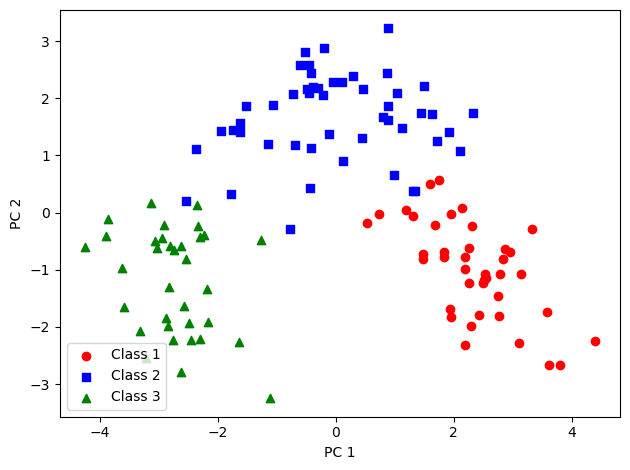

In [20]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                    X_train_pca[y_train==l, 1],
                    c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [21]:
### PCA in scikit-learn
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    marker = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y = X[y==cl, 1], alpha=0.8, c=colors[idx],marker=markers[idx],label=f'Class {cl}', edgecolor='black')
        

NOTE1: in the book, it uses multi_class='ovr' but newest sklearn just do its thing except liblinear(binary classification)

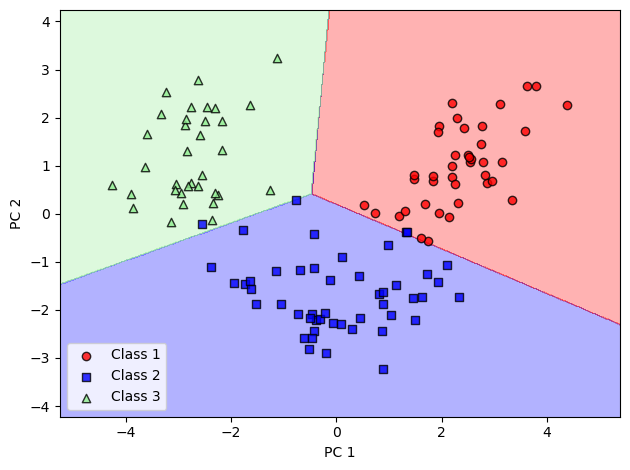

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
#initializing the PCA transformer and logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=1, solver='lbfgs')
#dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#fitting the logtistic regression model on the reduced dataset
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

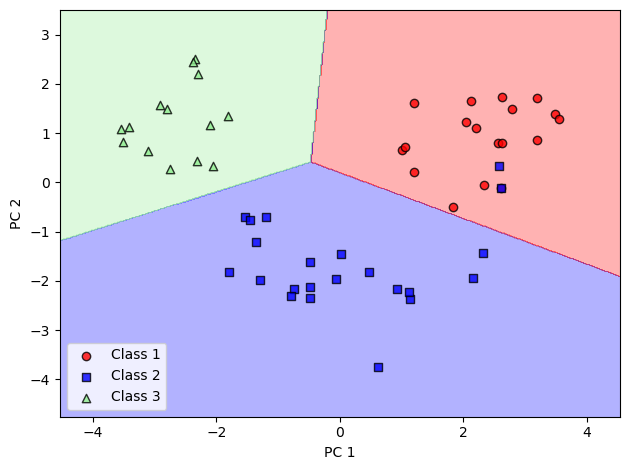

In [25]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [32]:
lr.score(X_test_pca, y_test)

0.9629629629629629

In [31]:
lr.score(X_train_pca, y_train)

0.975609756097561

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_ 

array([0.36584757, 0.19074656, 0.11010266, 0.07622236, 0.06677399,
       0.05174628, 0.04046205, 0.02676539, 0.02170402, 0.01520954,
       0.01447227, 0.01130043, 0.00864689])

In [36]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

In [ ]:
df_wine

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

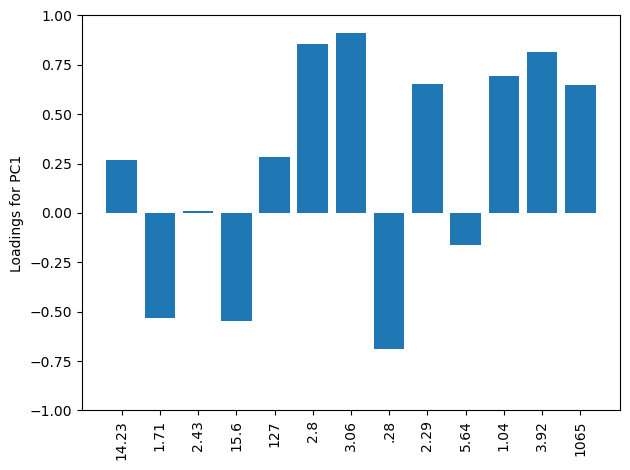

In [37]:
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

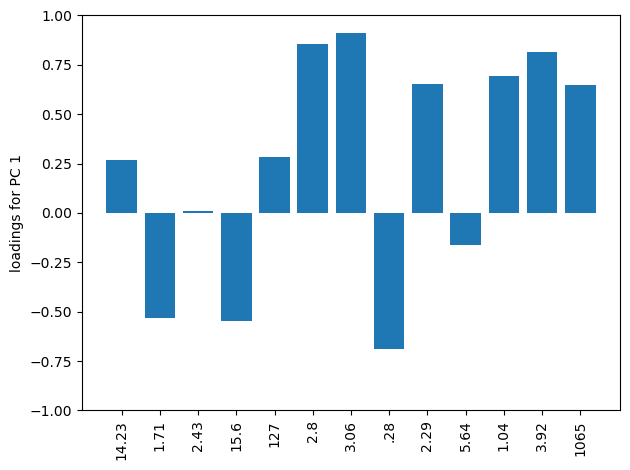

In [40]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:,0], align='center')
ax.set_ylabel('loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

LDA: supervised data compression 

In [42]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.8807 -0.3428  0.2687 -0.8193  0.4718  0.8881  0.9597 -0.6325  0.4794
  0.2394  0.5838  0.6963  1.2367]

MV 2: [-0.8811 -0.2894 -0.3636  0.3329 -0.398  -0.0317  0.0938 -0.0514  0.137
 -0.8377  0.3394  0.3511 -0.7462]

MV 3: [ 0.2336  0.8204  0.208   0.4841  0.0186 -0.9991 -1.2643  0.8182 -0.7615
  0.9256 -1.1759 -1.3252 -0.3796]



In [44]:
d = 13 #number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row-mv).T)
    S_W += class_scatter
print('within-class scatter matrix: '
        f'{S_W.shape[0]}x{S_W.shape[1]}')

within-class scatter matrix: 13x13


In [45]:
print('class label distribution:', np.bincount(y_train)[1:])

class label distribution: [40 49 34]


In [47]:
d = 13 # number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix:'
       f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix:13x13


In [48]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13 # number of features
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec  = mean_vec.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between class scatter matrix'
        f'{S_B.shape[0]}x{S_B.shape[1]}')

Between class scatter matrix13x13


selecting linear discriminants for the new feature subspace

In [49]:
eigen_vals, eigen_vecs = \
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [50]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [51]:
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

367.6327707926622
163.5777142799624
4.690740891285981e-14
1.7356857868136257e-14
1.4899565914731054e-14
1.4899565914731054e-14
1.3863467585867269e-14
1.3863467585867269e-14
1.1786697203194675e-14
1.1786697203194675e-14
7.786154855855188e-15
2.4884877192027994e-16
0.0


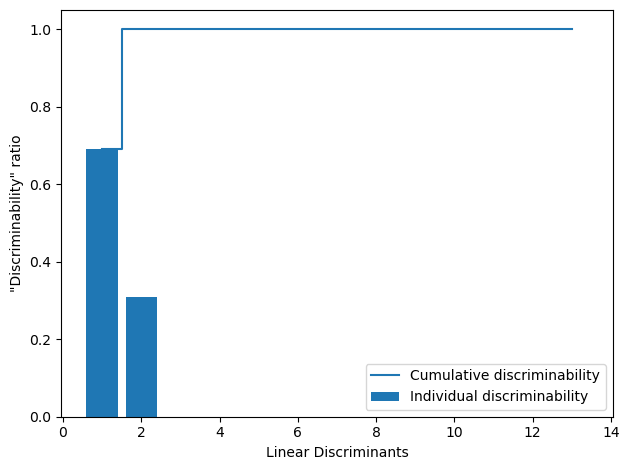

In [52]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
w  = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                        eigen_pairs[1][1][:, np.newaxis].real))
print(w)

[[-0.1178 -0.3454]
 [ 0.0538 -0.1982]
 [ 0.0132 -0.2757]
 [ 0.1464  0.2765]
 [-0.0114 -0.0372]
 [ 0.1857  0.0709]
 [-0.7478  0.2596]
 [-0.0529  0.0567]
 [ 0.0094  0.1547]
 [ 0.2737 -0.2711]
 [-0.0899  0.24  ]
 [-0.3504  0.0053]
 [-0.399  -0.676 ]]


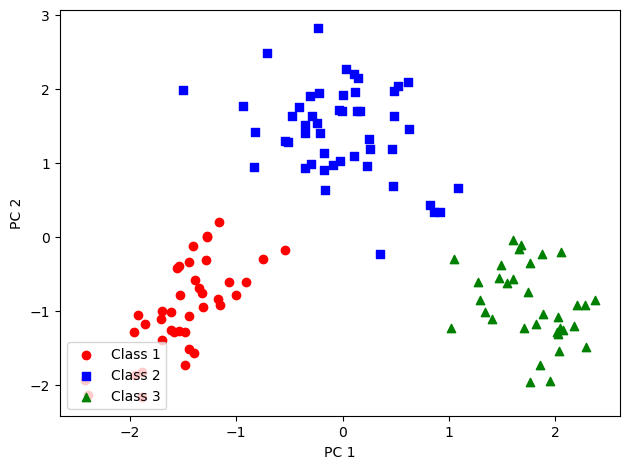

In [54]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                    X_train_lda[y_train==l, 1],
                    c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

LDA in SCIKIT_LEARN

In [56]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

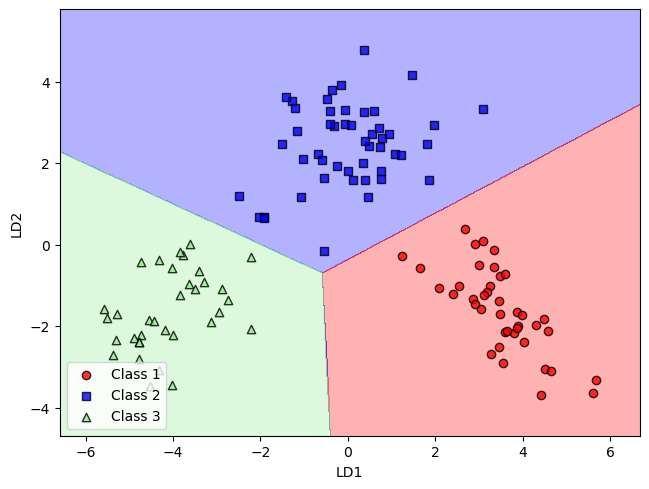

In [57]:
lr = LogisticRegression(solver='lbfgs', random_state=1)
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.tight_layout()
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

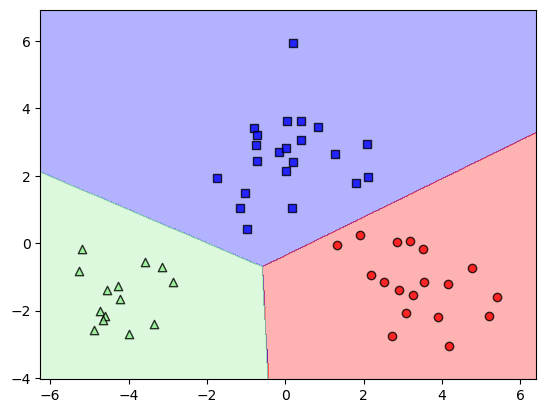

In [58]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.show()

Nonlinear dimensionality reduction and visualization

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()

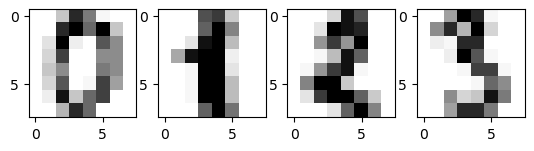

In [62]:
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [63]:
digits.data.shape

(1797, 64)

In [64]:
y_digits = digits.target
X_digits = digits.data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

In [ ]:
X_digits_tsne # tsne transformed to 2DIM

array([[ -2.9122, -53.7381],
       [ 10.2123,  12.3535],
       [-14.0633,  19.0544],
       ...,
       [ -6.1293,  11.245 ],
       [-21.3152, -15.0078],
       [-14.3079,   7.3762]], shape=(1797, 2), dtype=float32)

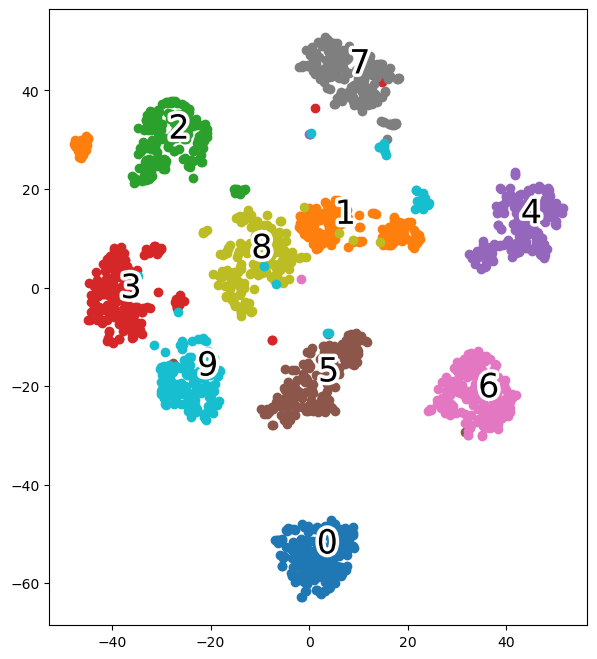

In [65]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i,0], x[colors==i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors==i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'), PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()